In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = 'data_cla/stars_train.csv'

In [4]:
df = pd.read_csv(path)

In [5]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,redshift,label
0,1.237659e+18,232.502422,45.121027,25.65923,22.36003,21.22009,20.18024,19.43329,0.547620,0
1,1.237654e+18,129.290210,48.672374,20.28340,20.09267,19.96514,19.58195,19.42377,1.673636,2
2,1.237656e+18,256.078422,35.629789,22.09653,22.06431,21.81846,21.55368,20.71617,1.141341,2
3,1.237679e+18,15.237270,11.871627,22.53424,21.76865,21.77098,21.59392,22.15125,0.000447,1
4,1.237665e+18,128.023708,25.454899,22.99427,21.43313,19.53053,18.75837,18.35530,0.453795,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52295 entries, 0 to 52294
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   obj_ID    52295 non-null  float64
 1   alpha     52295 non-null  float64
 2   delta     52295 non-null  float64
 3   u         52295 non-null  float64
 4   g         52295 non-null  float64
 5   r         52295 non-null  float64
 6   i         52295 non-null  float64
 7   z         52295 non-null  float64
 8   redshift  52295 non-null  float64
 9   label     52295 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 4.0 MB


In [7]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,redshift,label
count,5.229500e+04,52295.000000,52295.000000,52295.000000,52295.000000,52295.000000,52295.000000,52295.000000,52295.000000,52295.00000
mean,1.237665e+18,179.950018,24.176598,22.162707,20.691976,19.676736,19.095594,18.769568,0.573293,0.56929
std,8.561793e+12,95.692902,19.417517,2.269335,2.054398,1.860475,1.752333,1.755465,0.726127,0.77704
min,1.237646e+18,0.013337,-17.636198,10.996230,10.498200,9.822070,9.469903,9.612333,-0.009971,0.00000
25%,1.237659e+18,129.158091,6.261014,20.398010,19.012810,18.176300,17.764080,17.489495,0.061434,0.00000
50%,1.237664e+18,182.750060,23.289472,22.314630,21.190710,20.164010,19.419960,19.009600,0.434668,0.00000
75%,1.237670e+18,236.194344,39.359462,23.785235,22.187810,21.069815,20.391470,19.893945,0.691771,1.00000
max,1.237681e+18,359.999615,83.000519,30.660390,31.602240,29.571860,30.250090,28.238290,7.011245,2.00000


In [8]:
df.shape

(52295, 10)

([<matplotlib.axis.XTick at 0x1651f0610>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

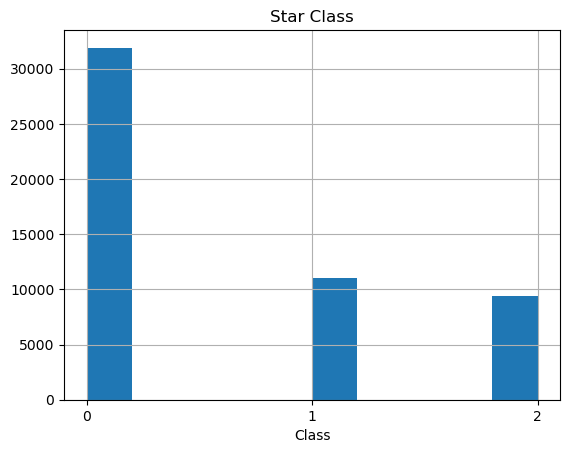

In [9]:
df['label'].hist()
plt.title('Star Class')
plt.xlabel('Class')
plt.xticks([0,1,2])

In [10]:
df.drop('obj_ID', axis=1, inplace=True)

<Axes: >

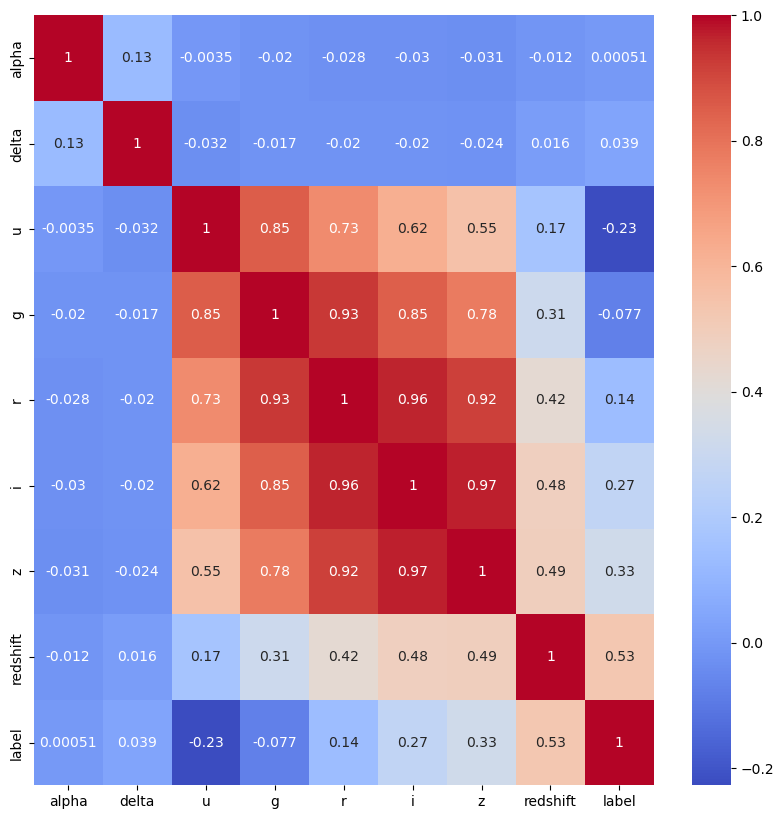

In [11]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [12]:
X = df.drop('label', axis=1)
y = df['label']

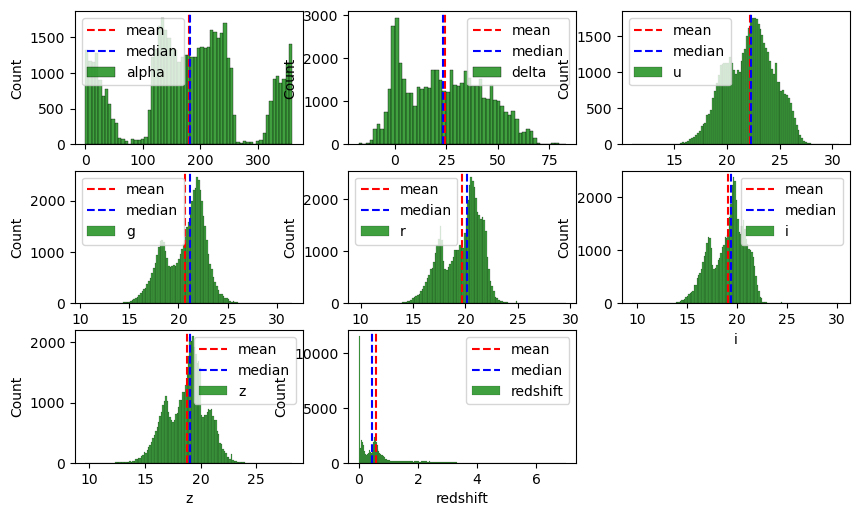

In [13]:
fig = plt.figure(figsize=(10, 10))
for i in range(len(X.columns)):
    fig.add_subplot(5, 3, i+1)
    sns.histplot(X.iloc[:, i], color='green', label=X.columns[i])
    # show the mean and median
    plt.axvline(X.iloc[:, i].mean(), linestyle='dashed', color='red', label='mean')
    plt.axvline(X.iloc[:, i].median(), linestyle='dashed', color='blue', label='median')
    plt.legend()

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

## Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.9727703839681812

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      7891
           1       0.99      1.00      0.99      2792
           2       0.95      0.91      0.93      2391

    accuracy                           0.97     13074
   macro avg       0.97      0.96      0.97     13074
weighted avg       0.97      0.97      0.97     13074



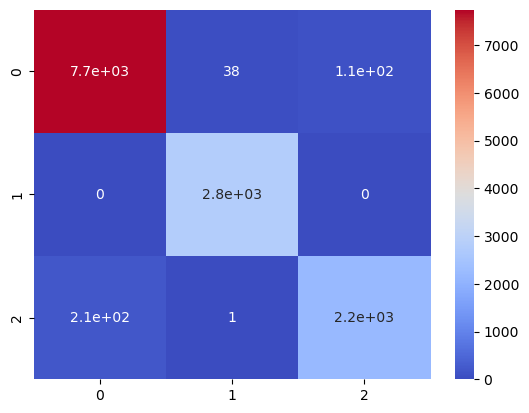

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cmap='coolwarm')

print(classification_report(y_test, y_preds))

## CatBoost Classifier

In [29]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier()
clf.fit(X_train, y_train, verbose=False)

clf.score(X_test, y_test)


0.9719290194278721

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      7891
           1       0.99      1.00      0.99      2792
           2       0.95      0.91      0.93      2391

    accuracy                           0.97     13074
   macro avg       0.97      0.96      0.97     13074
weighted avg       0.97      0.97      0.97     13074



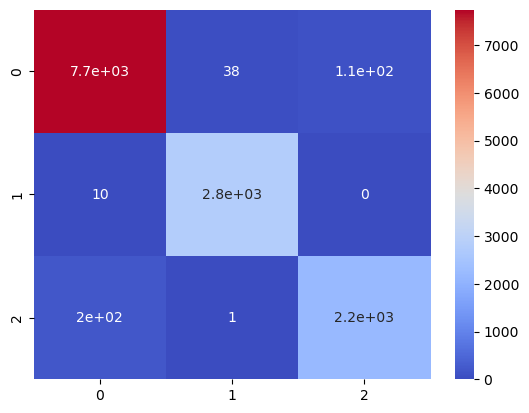

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cmap='coolwarm')

print(classification_report(y_test, y_preds))

## SVM Classifier

In [15]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.7068991892305339

              precision    recall  f1-score   support

           0       0.68      0.99      0.81      8024
           1       0.91      0.00      0.01      2739
           2       0.91      0.56      0.69      2311

    accuracy                           0.71     13074
   macro avg       0.83      0.52      0.50     13074
weighted avg       0.77      0.71      0.62     13074



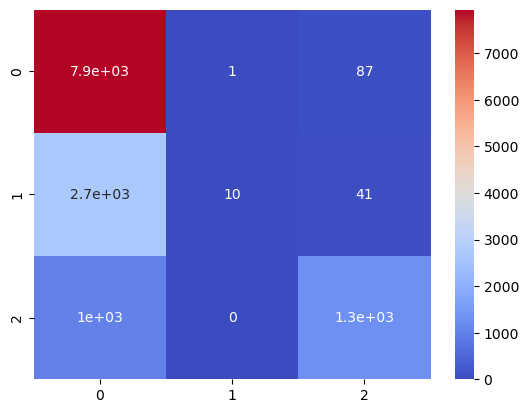

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cmap='coolwarm')

print(classification_report(y_test, y_preds))